In [2]:
import torch
from generator_zh import *

generator = Generator()
generator.load_state_dict(torch.load('../model/generator.pth', map_location=torch.device('cpu')))
generator.eval()

Generator(
  (initial): Sequential(
    (0): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
    (1): PReLU(num_parameters=1)
  )
  (residual_blocks): Sequential(
    (0): ResidualBlock(
      (block): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): PReLU(num_parameters=1)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): ResidualBlock(
      (block): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): PReLU(num_parameters=1)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e

In [3]:
from PIL import Image

image_path = '../original.jpg'
image = Image.open(image_path)
image.show()

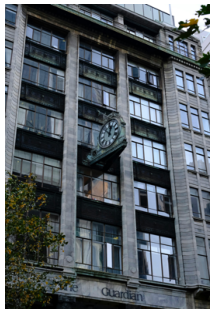

In [4]:
from matplotlib import pyplot as plt

lr_image = image.resize((image.width // 15, image.height // 15), Image.BICUBIC)

plt.figure(figsize=(lr_image.width / 50, lr_image.height / 50),dpi=50)
plt.imshow(lr_image,aspect='auto')
plt.axis('off')
plt.show()

lr_image.save('../test.jpg')

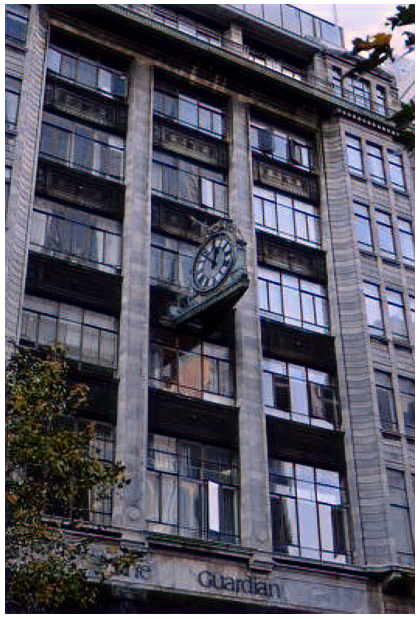

In [5]:
import numpy as np
from PIL import Image
from torchvision import transforms
from matplotlib import pyplot as plt

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

image_path = '../test.jpg'
lr_image = Image.open(image_path)
lr_image = transform(lr_image)

with torch.no_grad():
    fake_img = generator(lr_image.unsqueeze(0))
    fake_img = fake_img.squeeze().cpu().numpy()
    fake_img = (fake_img*0.5+0.5)*255.0
    fake_img = np.clip(fake_img, 0, 255).astype(np.uint8)
    fake_img = np.transpose(fake_img, (1, 2, 0))
    height, width, _ = fake_img.shape
    plt.figure(figsize=(width/50, height/50),dpi=50)
    plt.imshow(fake_img,aspect='auto')
    plt.axis('off')
    plt.show()
    fake_img = Image.fromarray(fake_img)
    fake_img.save('../processed_img.jpg')

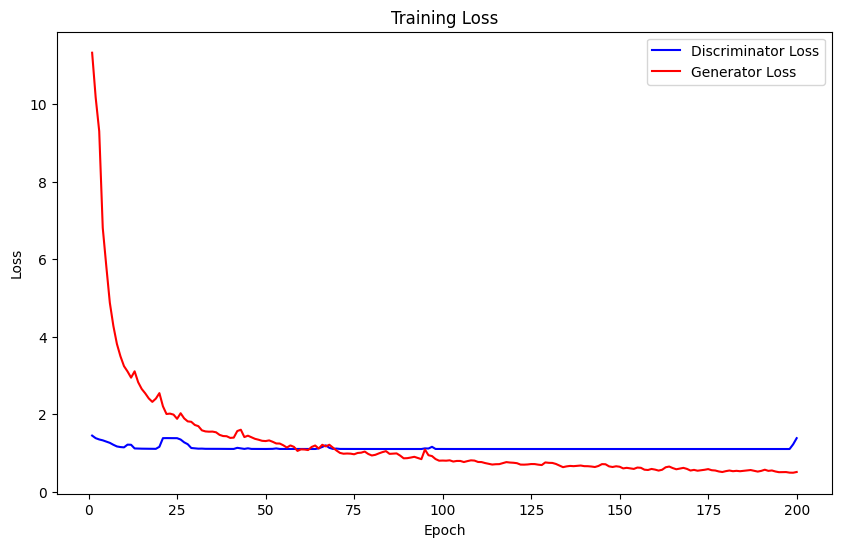

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../train.csv')

plt.figure(figsize=(10, 6))
plt.plot(df['Epoch'], df['d_loss'], label='Discriminator Loss', color='blue')
plt.plot(df['Epoch'], df['g_loss'], label='Generator Loss', color='red')

plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.savefig('../loss_plot.png')